In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df= pd.read_csv(r"C:\Users\Sahil\NLP\Models\train.csv")

In [35]:
df

,Id,Comment,Topic
0,0x840,A few things. You might have negative- frequen...,Biology
1,0xbf0,Is it so hard to believe that there exist part...,Physics
2,0x1dfc,There are bees,Biology
3,0xc7e,I'm a medication technician. And that's alot o...,Biology
4,0xbba,Cesium is such a pretty metal.,Chemistry
...,...,...,...
8690,0x1e02,I make similar observations over the last week...,Biology
8691,0xc8d,You would know.,Biology
8692,0x723,Also use the correct number of sig figs,Chemistry
8693,0x667,"What about the ethical delimmas, groundbreaki...",Biology


In [36]:
df.Topic.value_counts()

Topic
Biology      3591
Chemistry    2920
Physics      2184
Name: count, dtype: int64

C:\Users\Sahil\AppData\Local\Temp\ipykernel_27192\150589515.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


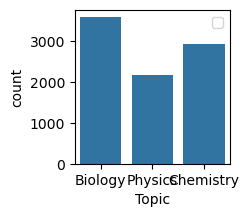

In [37]:
plt.figure(figsize=(2,2))
sns.countplot(x="Topic" , data= df)
plt.legend()

In [38]:
df = df[['Comment','Topic']]
df

,Comment,Topic
0,A few things. You might have negative- frequen...,Biology
1,Is it so hard to believe that there exist part...,Physics
2,There are bees,Biology
3,I'm a medication technician. And that's alot o...,Biology
4,Cesium is such a pretty metal.,Chemistry
...,...,...
8690,I make similar observations over the last week...,Biology
8691,You would know.,Biology
8692,Also use the correct number of sig figs,Chemistry
8693,"What about the ethical delimmas, groundbreaki...",Biology


In [39]:
df.isna().sum()

Comment    0
Topic      0
dtype: int64

In [40]:
blanks = []

for index , text in df['Comment'].items():
  if text.isspace():
    blanks.append(index)
len(blanks)

0

In [41]:
blanks

[]

In [42]:
from sklearn.model_selection import train_test_split

x = df['Comment']
y= df['Topic']

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.33 , random_state=42)

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
vc = TfidfVectorizer()
x_train_tfidf = vc.fit_transform(x_train)



In [44]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

In [45]:
text_clf = Pipeline([('tfidf' , TfidfVectorizer()) , ('clf' , LinearSVC())])
text_clf.fit(x_train , y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score , classification_report

In [47]:
def model(model):

  y_pred1 = model.predict(x_test)
  print("accuracy_score :",accuracy_score(y_test , y_pred1))
  print("confusion_matrix :",confusion_matrix(y_test , y_pred1))
  print("precision_score :",precision_score(y_test , y_pred1))
  print(classification_report(y_test, y_pred1))


In [48]:
model(text_clf)

accuracy_score : 0.7048780487804878
confusion_matrix : [[927 185  93]
 [225 654  91]
 [147 106 442]]


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].